In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import cis

## 正弦波の生成

In [3]:
fs = 8000
t = np.arange(0, 1, 1 / fs)
a = 0.8
f = 440
y = a * np.sin(2*np.pi*f*t)

cis.audioplay(y, fs)

### 可視化
ここでは1周分をプロットしてみる.

1周のサンプリング点数$N$は, 

$$ 
\begin{align*}
Fs &= 8000  \\
f &= 440
\end{align*}
$$

なので, 比率から

$$
\begin{align*}
N/8000 : 1/440 \\
N = 18.18...
\end{align*}
$$

と求まる.


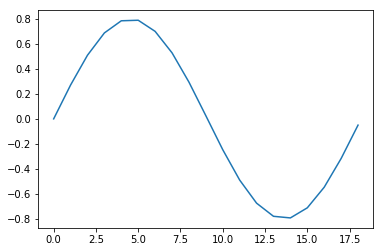

In [4]:
plt.plot(y[:   int(fs / 440) + 1])
plt.show()

### 時間軸で可視化


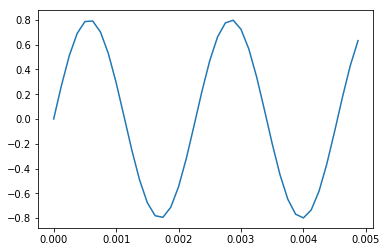

In [5]:
# x軸のデータとして t をわたす.
plt.plot(t[:40], y[:40])
plt.show()

## 波形の重ね合わせ

テキスト p.9〜

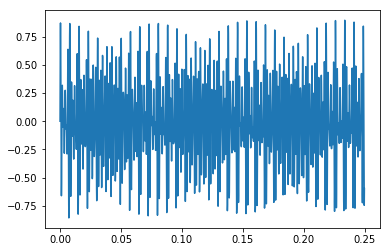

In [6]:
fs = 8000
t = np.arange(0, 1, 1/fs)
a = 0.3


def get_curve(f):
    return a*np.sin(2*np.pi*f*t)


# C の音を作成
y523 = get_curve(523)  # ド
y660 = get_curve(660)  # ミ
y784 = get_curve(784)  # ソ

yy = y523+y660+y784

cis.audioplay(yy, fs)

plt_size = 2000
plt.plot(t[:plt_size], yy[:plt_size])
plt.show()

ぱっとみ 0.07-0.08秒あたりで１周しているようにみえる.

### 疑問
波形を組み合わせた場合, もととなった波形の周波数がわかれば, 合成後の周期を求めることはできるのか？  
周波数の最小公倍数になる？

### うなり

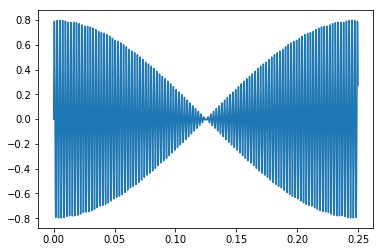

In [7]:
a = 0.4
f1 = 438
f2 = 442

y438 = get_curve(f1)
y442 = get_curve(f2)
yy = y438+y442
cis.audioplay(yy, fs)

plt_size = 2000
plt.plot(t[:plt_size], yy[:plt_size])
plt.show()

１つの音が振幅を変化させてなっているように聞こえる.

この式を和積の公式で, 積の形にする.

$$
\begin{align*}
yy &= a\sin(2\pi f_1t) + a\sin(2\pi f_2t) \\
yy &= 2a\{\sin(\frac{2\pi t(f_1+f_2)}{2}) * \cos(\frac{2\pi t(f_1-f_2)}{2})\} 
\end{align*}
$$

テキスト p11の $ayy$, $f_a$, $f_b$は, 

$$
\begin{align*}
ayy &= 2a \\
f_a &= (f_1+f_2)/2 \\
f_b &= (f_1-f_2)/2
\end{align*}
$$

と求まる.

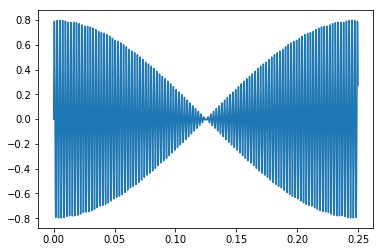

True


In [8]:
#  和積公式で求める

ayy = 2*a
fb = (f1-f2)/2
fa = (f1+f2)/2

yy2 = ayy*np.cos(2*np.pi*fb*t)*np.sin(2*np.pi*fa*t)
cis.audioplay(yy2, fs)

plt.plot(t[:plt_size], yy2[:plt_size])
plt.show()


def compare(a, b):
    """
    誤差考慮して比較する
    """
    tmp = abs(a-b)
    return (tmp < 1e-7).all()


# 上で求めたyy と一致してるか確認
print(compare(yy, yy2))

## 波形の連結

In [9]:
cis.audioplay(np.hstack((y523, y660)), fs)

## データ読み込み

In [10]:
v, fs = cis.wavread('/root/book_files/audio/vibra8.wav')
# cis.audioplay(v,fs)

# 読み込んだデータに, 440Hzの正弦波を足す
# このとき, データサイズが等しくなるよう注意

t = np.arange(0, 1, 1/fs)  # サンプリング周波数は, 読み込みデータと同じ
f = 440
a = 0.01
ysin = a*np.sin(2*np.pi*f*t)

print(v.shape, ysin.shape)

# サイズを合わせて加算し, 出力
start_t = 7000
vmix = v[start_t:start_t+fs] + ysin
cis.audioplay(vmix, fs)

(26000,) (8000,)
